<b>Figures for the 2nd Draft of Richard's CH$_4$ and N$_2$O paper. Started 2-2-2023.</b>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import numpy
import scipy
import model.ghg_conversions as ghgc
import utilities.plotting_utilities as p
from labellines import labelLines, labelLine
import scienceplots
from matplotlib import rcParams
%load_ext autoreload

import warnings
warnings.filterwarnings('ignore')


In [2]:
save_plots = True
benchmark_color = '#009988'
benchmark_style = 'dotted'

In [3]:
all_x_main = dict()
all_y_main = dict()
def add_line(line,prefix=""):
    name=line.get_label()
    (x,y)=line.get_data()
    all_x_main[prefix+name]=x
    all_y_main[prefix+name]=y

<b>Ground-based system with natural airflow and solar illumination:</b>

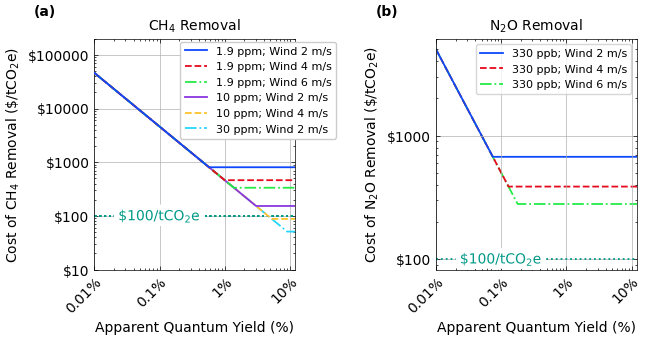

In [4]:
# Force reload to facilitate debugging
%autoreload 2

import model.passive_model as pm
from math import floor
import string
import matplotlib
from matplotlib.ticker import LogLocator

plt.style.use(['science','nature','no-latex','high-vis']) # Necessary for some reason to make styles work on first run after kernel restart.

pm_params = pm.passive_model_params('CH4') # Parameter object for the passive model
fig, axs = plt.subplots(1,2,figsize=(7,3),gridspec_kw={'wspace':0.7,'hspace':0.7}) # Set figure size properly
ppms = (1.9,10,50,100)
#ppm_labels = (r"1.9 ppm CH$_4$",r"10 ppm CH$_4$",r"50 ppm CH$_4$",r"100 ppm CH$_4$")
#ppm_labels = ("1.9 ppm","10 ppm","50 ppm","100 ppm")
#wind_speeds = (1,2,4,6)
#wind_speed_labels = ("Wind 1 m/s","Wind 2 m/s","Wind 4 m/s","Wind 6 m/s")
to_plot = ((1.9,2,"1.9 ppm; Wind 2 m/s"),(1.9,4,"1.9 ppm; Wind 4 m/s"),(1.9,6,"1.9 ppm; Wind 6 m/s"),
           (10,2,"10 ppm; Wind 2 m/s"),(10,4,"10 ppm; Wind 4 m/s"),
           (30,2,"30 ppm; Wind 2 m/s"))#[::-1]
g = p.r_plot(style="1 Column",fig=fig,ax=axs[0])
g.do_cosmetics_setup()
# Sweep through the wind speeds to plot
z=100
for kludge in to_plot:
    # Adjust the parameter object
    pm_params.ghg_ppm = kludge[0]
    # Make the subplot
    z=z-10
    g.generate_plot(params=pm_params, function=lambda q: ghgc.per_mole_to_per_ton_CO2e((pm.calculate_figures_of_merit(q))["Cost per Mole"],'CH4'), 
                    which_is_x='AQY',x_values=numpy.geomspace(1e-4,1,1000), 
                    which_is_lines='air_velocity', line_values=[kludge[1]], line_labels=[kludge[2]],zorder=z)
    g.format_axes_log(x_formatter=p.percent_formatter,y_formatter=p.dollar_formatter,y_lims=(80,8e5),x_lims=(1e-4,1),rotate_x=45,which_grids=('major x','major y'))
    g.add_labels(x_label="Apparent Quantum Yield (%)",y_label=r'Cost of CH$_4$ Removal (\$/tCO$_2$e)', title=r"CH$_4$ Removal")
    g.do_cosmetics_post()
    # Manually add sub-figure labels and benchmark lines
    #g.ax.text(-0.3,1.1, "(a)", transform=g.ax.transAxes, size=10, weight='bold')
    q = g.ax.plot([1e-7,1.1],[100,100],color=benchmark_color,linestyle=benchmark_style)
    labelLine(q[0],1e-3,label=r"\$100/tCO$_2$e",fontsize=10)
    g.ax.legend(fontsize=6.5,frameon=True)
    #if i<=1: # Manually override the bottom limit so the 100/tCO2e line doesn't cover any tickmarks
    #    g.ax.set_ylim(bottom=50)
    #if i==0: # Manually override the top limit to make the legend show in the top-right
    #    g.ax.set_ylim(bottom=8)
    #    g.ax.set_ylim(top=9e5)

axs[0].text(-0.3,1.1, "(a)", transform=g.ax.transAxes, size=10, weight='bold')
    
# Make the last plot the N2O one
# Adjust the parameter object
pm_params = pm.passive_model_params('N2O') # Parameter object for the passive model
pm_params.ghg_ppm = 0.33
wind_speeds = (2,4,6)#[::-1]
wind_speed_labels = ("330 ppb; Wind 2 m/s","330 ppb; Wind 4 m/s","330 ppb; Wind 6 m/s")#[::-1]
# Make the subplot
g = p.r_plot(style="1 Column",fig=fig,ax=axs[1])
g.do_cosmetics_setup()
#print(dir(g.ax._get_lines.prop_cycler))
#g.ax._get_lines.prop_cycler.__setstate__(1)
g.generate_plot(params=pm_params, function=lambda q: ghgc.per_mole_to_per_ton_CO2e((pm.calculate_figures_of_merit(q))["Cost per Mole"],'N2O'), 
                which_is_x='AQY',x_values=numpy.geomspace(1e-4,1,1000), 
                which_is_lines='air_velocity', line_values=wind_speeds, line_labels=wind_speed_labels)
g.format_axes_log(x_formatter=p.percent_formatter,y_formatter=p.dollar_formatter,x_lims=(1e-4,1),y_lims=None,rotate_x=45,which_grids=('major x','major y'))
g.add_labels(x_label="Apparent Quantum Yield (%)",y_label=r'Cost of N$_2$O Removal (\$/tCO$_2$e)', title=r"N$_2$O Removal")
g.do_cosmetics_post()
# Manually add subfigure labels and benchmark lines
g.ax.text(-0.3,1.1, "(b)", transform=g.ax.transAxes, size=10, weight='bold')
q = g.ax.plot([1e-7,1.1],[100,100],color=benchmark_color,linestyle=benchmark_style)
labelLine(q[0],1e-3,label=r"\$100/tCO$_2$e",fontsize=10)
#g.ax.set_ylim(bottom=80)
g.ax.legend(fontsize=8,frameon=True)

for ax in axs:
    f = 10
    ax.tick_params(axis='x', labelsize=f)
    ax.tick_params(axis='y', labelsize=f)
    q = 10
    ax.set_title(ax.get_title(), fontsize=q)
    ax.set_xlabel(ax.get_xlabel(), fontsize=q)
    ax.set_ylabel(ax.get_ylabel(), fontsize=q)
    ax.legend(fontsize=8,frameon=True,framealpha=1)
    ax.xaxis.set_major_locator(LogLocator(base = 10.0, numticks=1000))
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = numpy.arange(1.0, 10.0) * 0.1, numticks = 20)
    ax.xaxis.set_minor_locator(x_minor)
    ax.set_xlim(0.0001,0.12)
    
axs[0].set_ylim(10,2e5)

# Kludge to make the legend look better
handles, labels = axs[0].get_legend_handles_labels()
order = tuple(range(len(to_plot)))#[::-1]
axs[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=8,frameon=True,bbox_to_anchor=(0.4, 1.01),framealpha=1) 
handles, labels = axs[1].get_legend_handles_labels()
order = tuple(range(len(wind_speeds)))#[::-1]
axs[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=8,frameon=True)

# Grab data
for l in axs[0].get_lines():
    add_line(l,"Paint; CH4; ")
for l in axs[1].get_lines():
    add_line(l,"Paint; N2O; ")  

# Save and  show
if save_plots:
    g.save_plot(savename="autosaved_images/Passive Solar CH4 and N2O Cost - Smaller",filetype=".svg")
g.show_plot()

In [5]:
# Do the imports
import model.active_model as am

def plot_contacting_cost(which_gas,fig=None,ax=None, n = 50):
    # Conditionals
    if which_gas == 'CH4':
        title = r"Air Contacting Costs for CH$_4$"
    else:
        title = r"Air Contacting Costs for N$_2$O"
    # Create the air contacting plot
    am_params = am.active_model_params(which_gas) # Parameter object for the active model

    # These plots sweep out different rates
    # CH4 mass transfer limit is reached at ~2µm/m2s and N2O at ~0.2µm/m2s, but the plot looks better if we plot it at multiples of 0.1.
    am_params.LCOE = 0.04
    if which_gas == 'CH4':
        ambient_rates = (1e-6,1e-7,1e-8,1e-9)
        ambient_rate_labels = ('1µmol/m$^2$s','0.1µmol/m$^2$s','0.01µmol/m$^2$s','1nmol/m$^2$s')
    else:
        ambient_rates = (1e-7,1e-8,1e-9,1e-10)
        ambient_rate_labels = ('0.1µmol/m$^2$s','0.01µmol/m$^2$s','1nmol/m$^2$s','0.1nmol/m$^2$s')

    # Make the subplot
    g = p.r_plot(style="1 Column",figsize=(3.2,2.8),fig=fig,ax=ax)
    g.do_cosmetics_setup()
    g.generate_plot(params=am_params, function=lambda q: ghgc.per_mole_to_per_ton_CO2e((am.calculate_active_amr_cost(q))["Contacting Cost per Mole"],which_gas), 
                    which_is_x='start_ppm',x_values=numpy.geomspace(0.1,100,n), 
                    which_is_lines='reaction_rate_at_ambient_conc', line_values=ambient_rates, line_labels=ambient_rate_labels)
    g.format_axes_log(x_formatter=p.default_formatter,y_formatter=p.dollar_formatter,x_lims=None,y_lims=None,
                      minor_tick_labels=('x'),rotate_x=90,which_grids=('major x','major y')),
    g.add_labels(x_label="Inlet GHG Concentration (ppm)",y_label=r'Cost (\$/tCO$_2$e)',
                 title=title)
    g.do_cosmetics_post()
    # Manual overrides to get benchmarks, etc.
    lines = g.ax.get_lines()
    if which_gas == 'CH4':
        # Vertical benchmark for ambient CH4 concentration
        endpoint_amb_ch4 = 1e6#numpy.interp(1.9,lines[2].get_xdata(),lines[2].get_ydata())
        q = g.ax.plot((1.9,1.9+1e-7),(0.1,endpoint_amb_ch4),color=benchmark_color,linestyle=benchmark_style)
        labelLine(q[0], 1.9, label=r"Ambient",yoffset=2,yoffset_logspace=True,fontsize=10)
    else:
        # Vertical benchmark for ambient N2O concentration
        endpoint_amb_n2o = 1e6#numpy.interp(0.33,lines[2].get_xdata(),lines[2].get_ydata())
        q = g.ax.plot((0.33,0.33+1e-7),(0.1,endpoint_amb_n2o),color=benchmark_color,linestyle=benchmark_style)
        labelLine(q[0], 0.33, label=r"Ambient",yoffset=2,yoffset_logspace=True,fontsize=10)
    g.ax.yaxis.set_ticks_position('left')
    g.ax.legend(fontsize=6.5)
    return g
    
# For debugging it's useful to make the plots separately instead of combined into one multipart figure
#g = plot_contacting_cost()
#if save_plots:
#    g.save_plot(savename="autosaved_images/Active LED Electricity Cost",filetype=".svg")
#g.show_plot()

In [6]:
def plot_LED_cost(which_gas,fig=None,ax=None,n=50):
    # Conditionals
    if which_gas == 'CH4':
        title = r"Lighting Costs for CH$_4$"
    else:
        title = r"Lighting Costs for N$_2$O"
    # Create the LED plot
    am_params = am.active_model_params(which_gas) # Parameter object for the active model
    am_params.is_photocatalytic = True
    lcoes = (0.02,0.04,0.06)#,0.08)
    lcoe_labels = ("LCOE = 2 c/kWh","LCOE = 4 c/kWh","LCOE = 6 c/kWh")#,"LCOE = 8 c/kWh")
    # Make the subplot
    g = p.r_plot(style="1 Column",fig=fig,ax=ax,force_cycler=4)
    g.do_cosmetics_setup()
    g.generate_plot(params=am_params, function=lambda q: ghgc.per_mole_to_per_ton_CO2e(am.calculate_LED_cost_per_mole(q),which_gas), 
                    which_is_x='AQY',x_values=numpy.geomspace(1e-3,1,n), 
                    which_is_lines='LCOE', line_values=lcoes, line_labels=lcoe_labels)
    g.format_axes_log(x_formatter=p.percent_formatter,y_formatter=p.dollar_formatter,x_lims=(1e-3,1),y_lims=None,rotate_x=45,which_grids=('major x','major y'))
    g.add_labels(x_label="Apparent Quantum Yield (%)",y_label=r"Cost (\$/tCO$_2$e)",
                 title=title)
    g.do_cosmetics_post()
    # Manual overrides to get benchmarks, etc.
    lines = g.ax.get_lines()
    q = g.ax.plot((1e-7,1),(100,100),color=benchmark_color,linestyle=benchmark_style)
    where_label = 8e-3 if which_gas == 'CH4' else 0.003
    labelLine(q[0],where_label,label=r"\$100/tCO$_2$e",fontsize=10)
    #n2o_100 = ghgc.secax_helper_backward(100)
    #q = g.ax.plot((numpy.interp(n2o_100,lines[0].get_ydata()[::-1],lines[0].get_xdata()[::-1]),1.1),(n2o_100,n2o_100),color=benchmark_color,linestyle='dashdot')
    #labelLine(q[0],1e-1,label=r"\$100/tCO$_2$e (N$_2$O)")
    #g.ax.set_ylim(bottom=60)
    g.ax.yaxis.set_ticks_position('left')
    g.ax.legend(fontsize=6.5)
    return g

# For debugging it's useful to make the plots separately instead of combined into one multipart figure
# g = plot_LED_cost()
#if save_plots:
#    g.save_plot(savename="autosaved_images/Active LED Electricity Cost",filetype=".svg")
#g.show_plot()

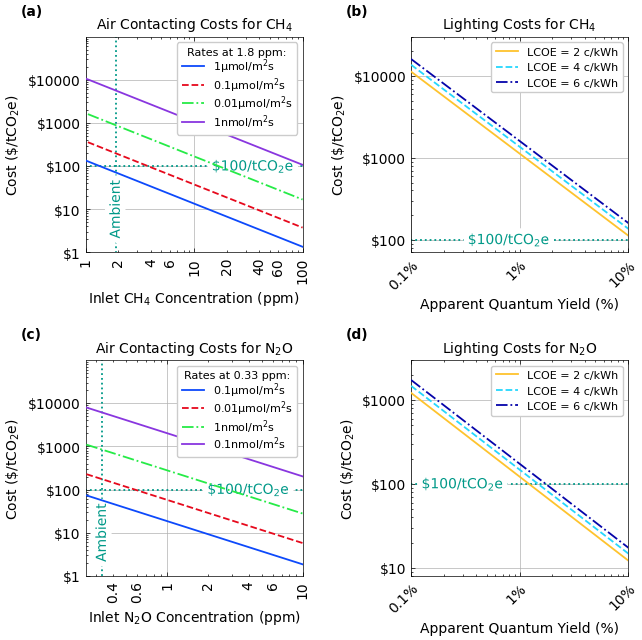

In [7]:
# Force reload to facilitate debugging
import importlib
importlib.reload(am)
importlib.reload(p)

# Number of points to plot
n = 30#30 # This is the number of points plotted for each line. Since the solver is really slow, turn this down to 3 or 4 if you
# want to mess with the code and see how if affects the results. Also, in active_model.py, there's a 'n=50' that you can turn down 
# to 'n=10' to make the solver run a lot faster, with a slight reduction in guarantee that you'll find the lowest-cost system.
# With the default settings (used for the paper plots), it takes 22 min to run on my computer.

# Make a multipart figure containing both plots for the active system
fig, axs = plt.subplots(2,2,figsize=(7,7),gridspec_kw={'wspace':0.5,'hspace':0.5}) # Set figure size properly
g1 = plot_contacting_cost('CH4',fig,axs[0,0],n)
g1.ax.text(-0.3,1.1, "(a)", transform=g1.ax.transAxes, size=10, weight='bold')
g2 = plot_LED_cost('CH4',fig,axs[0,1],n)
g2.ax.text(-0.3,1.1, "(b)", transform=g2.ax.transAxes, size=10, weight='bold')
g3 = plot_contacting_cost('N2O',fig,axs[1,0],n)
g3.ax.text(-0.3,1.1, "(c)", transform=g3.ax.transAxes, size=10, weight='bold')
g4 = plot_LED_cost('N2O',fig,axs[1,1],n)
g4.ax.text(-0.3,1.1, "(d)", transform=g4.ax.transAxes, size=10, weight='bold')

print_tests = False
#These are to tell us the values of each line on each contactor chart evaluated at ambient concentrations
#This lets us do sensitivities for things like LCOE and put the results in the prose of the paper, in addition to generating the plots
def log_interp(zz, xx, yy):
    logz = numpy.log10(zz)
    logx = numpy.log10(xx)
    logy = numpy.log10(yy)
    return numpy.power(10.0, numpy.interp(logz, logx, logy))
if print_tests:
    print("Plotted lines' 2-ppm values for CH4 under current settings: ")
    for l in list(g1.ax.get_lines())[:4]:
        print(round(log_interp(2,list(l.get_xdata()),list(l.get_ydata()))))
    print("Plotted lines' 0.33-ppm values for N2O under current settings: ")
    for l in list(g3.ax.get_lines())[:4]:
        print(round(log_interp(0.33,list(l.get_xdata()),list(l.get_ydata()))))

g1.ax.set_ylim(1,99000)
g1.ax.set_xlim(1,100)
g3.ax.set_xlim(0.25,10)
g3.ax.set_ylim(1,99000)
g4.ax.set_ylim(0.2,3000)

q = g1.ax.plot((1e-7,100),(100,100),color=benchmark_color,linestyle=benchmark_style)
where_label = 35
labelLine(q[0],where_label,label=r"\$100/tCO$_2$e",fontsize=10)

q = g3.ax.plot((1e-7,100),(100,100),color=benchmark_color,linestyle=benchmark_style)
where_label = 4
labelLine(q[0],where_label,label=r"\$100/tCO$_2$e",fontsize=10)

g1.ax.set_xlabel('Inlet CH$_4$ Concentration (ppm)')
g3.ax.set_xlabel('Inlet N$_2$O Concentration (ppm)')

for ax in [g1.ax,g2.ax,g3.ax,g4.ax]:
    f = 10
    ax.tick_params(axis='x', which='both', labelsize=f)
    ax.tick_params(axis='y', which='both', labelsize=f)
    q = 10
    ax.set_title(ax.get_title(), fontsize=q)
    ax.set_xlabel(ax.get_xlabel(), fontsize=q)
    ax.set_ylabel(ax.get_ylabel(), fontsize=q)
g1.ax.legend(fontsize=8,frameon=True,framealpha=1, labelspacing=0, title='Rates at 1.8 ppm:',title_fontsize=8).set_zorder(100)
g2.ax.legend(fontsize=8,frameon=True,framealpha=1)
g3.ax.legend(fontsize=8,frameon=True,framealpha=1, labelspacing=0, title='Rates at 0.33 ppm:',title_fontsize=8).set_zorder(100)
g4.ax.legend(fontsize=8,frameon=True,framealpha=1)

g2.ax.set_xlim(0.001,0.1)
g4.ax.set_xlim(0.001,0.1)
g2.ax.set_ylim(70,30000)
g4.ax.set_ylim(8,3000)
    
# Saving, etc.
savename = "autosaved_images/Combined Active System Plots"
filetype = ".svg"
plt.savefig((savename+filetype),bbox_inches='tight')
g1.show_plot()
plt.show()

In [8]:
# Grab data
for l in g2.ax.get_lines():
    add_line(l,"DAC; CH4; ")
for l in g4.ax.get_lines():
    add_line(l,"DAC; N2O; ")  

<b>Aerosol-based system with sunlight and aerial dispersion of photocatalyst powders:</b>

In [9]:
# Do imports
# Do imports
import model.aerosol_model as aero

def plot_CH4_aero_cost_DQY(fig=None,ax=None,benchmark=True):
    # Adjust the parameter object
    aero_params = aero.aerosol_model_params('CH4') # Parameter object
    aero_params.particle_diameter=1
    aero_params.start_ppm = 1.9
    # Make the subplot
    altitudes = ["Lower Troposphere","Upper Troposphere"]
    altitude_labels = ["Lower Tropo. (<1.5km)","Upper Tropo. (>1.5km)"]
    g = p.r_plot(style="1 Column",figsize=(3,2.8),fig=fig,ax=ax)
    g.do_cosmetics_setup()
    g.generate_plot(params=aero_params, function=lambda q: ghgc.per_mole_to_per_ton_CO2e(aero.get_cost_per_mole(q)["Removal Cost per Mole"],'CH4'), 
                    which_is_x='AQY',x_values=numpy.geomspace(1e-4,1), 
                    which_is_lines='altitude', line_values=altitudes, line_labels=altitude_labels)
    g.format_axes_log(x_formatter=p.percent_formatter,y_formatter=p.dollar_formatter,x_lims=None,y_lims=None,rotate_x=45,which_grids=('major x','major y'))
    g.add_labels(x_label="Apparent Quantum Yield",y_label=r'Cost of CH$_4$ Removal (\$/tCO$_2$e)',
                 title=r"Removal of 1.9 ppm CH$_4$ using"+"\n"+r"1$\mu$m Aerosol Particles")
    g.do_cosmetics_post()
    # Manually add benchmark lines and other cosmetics
    if benchmark:
        q = g.ax.plot([1e-4,1],[100,100],color=benchmark_color,linestyle=benchmark_style)
        labelLine(q[0],5e-4,label=r"\$100/tCO$_2$e",fontsize=10)
    g.ax.legend(fontsize=6.5)
    g.ax.set_xticks([1e-4,1e-3,1e-2,1e-1,1])
    return g

# For debugging it's useful to make the plots separately instead of combined into one multipart figure
#g = plot_CH4_aero_cost_DQY()
#if save_plots:
#    g.save_plot(savename="autosaved_images/Aerosol 1um CH4 Cost",filetype=".svg")
#g.show_plot()

In [10]:
def plot_N2O_aero_cost_DQY(fig=None,ax=None,benchmark=True):
    # Adjust the parameter object
    aero_params = aero.aerosol_model_params('N2O') # Parameter object
    aero_params.particle_diameter=1
    aero_params.start_ppm = 0.33
    # Make the subplot
    altitudes = ["Lower Troposphere","Upper Troposphere"]
    altitude_labels = ["Lower Tropo. (<1.5km)","Upper Tropo. (>1.5km)"]
    g = p.r_plot(style="1 Column",figsize=(3,2.8),fig=fig,ax=ax)
    g.do_cosmetics_setup()
    g.generate_plot(params=aero_params, function=lambda q: ghgc.per_mole_to_per_ton_CO2e(aero.get_cost_per_mole(q)["Removal Cost per Mole"],'N2O'), 
                    which_is_x='AQY',x_values=numpy.geomspace(1e-4,1), 
                    which_is_lines='altitude', line_values=altitudes, line_labels=altitude_labels)
    g.format_axes_log(x_formatter=p.percent_formatter,y_formatter=p.dollar_formatter,x_lims=None,y_lims=None,rotate_x=45,which_grids=('major x','major y'))
    g.add_labels(x_label="Apparent Quantum Yield",y_label=r'Cost of N$_2$O Removal (\$/tCO$_2$e)',
                 title=r"Removal of 330 ppb N$_2$O using "+"\n"+r"1$\mu$m Aerosol Particles")
    g.do_cosmetics_post()
    # Manually add benchmark lines and other cosmetics
    if benchmark:
        q = g.ax.plot([1e-4,1],[100,100],color=benchmark_color,linestyle=benchmark_style)
        labelLine(q[0],1.2e-2,label=r"\$100/tCO$_2$e",fontsize=10)
    g.ax.legend(fontsize=6.5)
    g.ax.set_xticks([1e-4,1e-3,1e-2,1e-1,1])
    return g

# For debugging it's useful to make the plots separately instead of combined into one multipart figure
#g = plot_N2O_aero_cost_DQY()
#if save_plots:
#    g.save_plot(savename="autosaved_images/Aerosol 1um N2O Cost",filetype=".svg")
#g.show_plot()

In [11]:
def plot_aero_cost_diameter(fig=None,ax=None,benchmark=True):
    # Adjust the parameter object
    aero_params = aero.aerosol_model_params('CH4') # Parameter object
    aero_params.AQY = 0.0081 #Value required to get $100/ton in lower troposphere
    aero_params.start_ppm = 1.9
    # Make the subplot
    altitudes = ["Lower Troposphere","Upper Troposphere"]
    altitude_labels = ["Lower Troposphere (<1.5km)","Upper Troposphere (>1.5km)"]
    g = p.r_plot(style="1 Column",figsize=(3,2.8),fig=fig,ax=ax)
    g.do_cosmetics_setup()
    g.generate_plot(params=aero_params, function=lambda q: ghgc.per_mole_to_per_ton_CO2e(aero.get_cost_per_mole(q)["Removal Cost per Mole"],aero_params.which_GHG), 
                    which_is_x='particle_diameter',x_values=numpy.geomspace(0.1,30), 
                    which_is_lines='altitude', line_values=altitudes, line_labels=altitude_labels)
    g.format_axes_log(x_formatter=p.default_formatter,y_formatter=p.dollar_formatter,x_lims=(0.1,35),y_lims=(0.02,5e3),rotate_x=90,minor_tick_labels=('x'),which_grids=('major x','major y'))
    g.add_labels(x_label=r"Particle Diameter ($\mu$m)",y_label=r'Cost of GHG Removal (\$/tCO$_2$e)',
                 title="Effect of Particle Size on GHG Removal Cost\n"+"(With "+r"\$100/tCO$_2$e for 1$\mu$m particles in lower tropo.)")
    g.do_cosmetics_post()
    
    # Manually add benchmark lines and other cosmetics
    
    # Vertical benchmark for pm2.5
    lines = g.ax.get_lines()
    endpoint_pm25 = numpy.interp(2.5,lines[0].get_xdata(),lines[0].get_ydata())
    if benchmark:
        q = g.ax.plot((2.5,2.5+1e-7),(6,endpoint_pm25),color=benchmark_color,linestyle=benchmark_style)
        labelLine(q[0], 2.5+5e-8, label=r"PM$_{2.5}$",yoffset=-0.65,yoffset_logspace=True,fontsize=10)
    # Vertical benchmark for pm10
    endpoint_pm10 = numpy.interp(10,lines[0].get_xdata(),lines[0].get_ydata())
    q = g.ax.plot((10,10+1e-7),(6,endpoint_pm10),color=benchmark_color,linestyle=benchmark_style)
    labelLine(q[0], 10+5e-8, label=r"PM$_{10}$",yoffset=-1.4,yoffset_logspace=True,fontsize=10)
    return g

# For debugging it's useful to make the plots separately instead of combined into one multipart figure
#g = plot_aero_cost_diameter()
#if save_plots:
#    g.save_plot(savename="autosaved_images/Aerosol CH4 Cost vs Radius",filetype=".svg")
#g.show_plot()

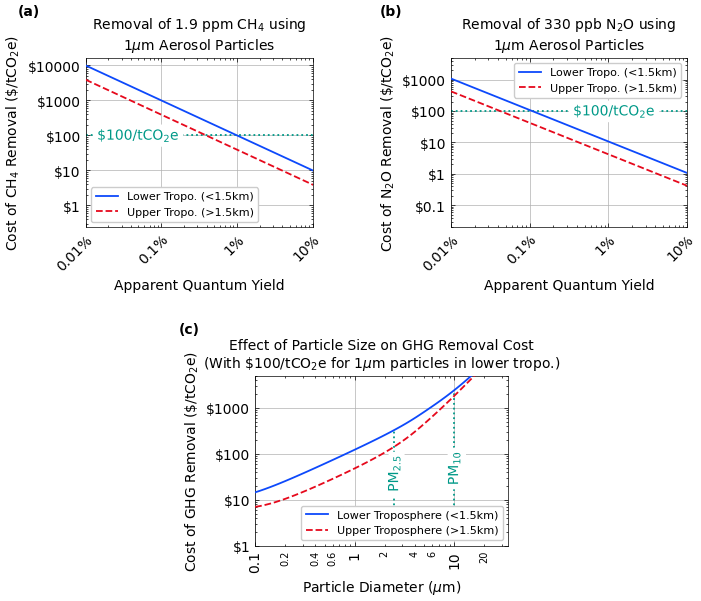

In [12]:
# Force reload to facilitate debugging
%autoreload 2

# Make a multipart figure containing both plots for the active system
fig = plt.figure(figsize=(7, 6), layout="constrained")
gs = fig.add_gridspec(ncols=4, nrows=4)
gs.update(wspace=0.1, hspace=0.2)
ax1 = plt.subplot(gs[:2, :2])
ax2 = plt.subplot(gs[:2, 2:])
ax3 = plt.subplot(gs[2:4, 1:3])
g1 = plot_CH4_aero_cost_DQY(fig,ax1)
g2 = plot_N2O_aero_cost_DQY(fig,ax2)
g3 = plot_aero_cost_diameter(fig,ax3)
g1.ax.text(-0.3,1.25, "(a)", transform=g1.ax.transAxes, size=10, weight='bold')
g2.ax.text(-0.3,1.25, "(b)", transform=g2.ax.transAxes, size=10, weight='bold')
g3.ax.text(-0.3,1.25, "(c)", transform=g3.ax.transAxes, size=10, weight='bold')
g2.ax.set_ylim(0.02,5e3)
g3.ax.set_ylim(1,5e3)

for ax in [g1.ax,g2.ax,g3.ax]:
    f = 10
    ax.tick_params(axis='x', labelsize=f)
    ax.tick_params(axis='y', labelsize=f)
    q = 10
    ax.set_title(ax.get_title(), fontsize=q)
    ax.set_xlabel(ax.get_xlabel(), fontsize=q)
    ax.set_ylabel(ax.get_ylabel(), fontsize=q)
    ax.legend(fontsize=8,frameon=True,framealpha=1)
    
for ax in [g1.ax, g2.ax]:
    ax.xaxis.set_major_locator(LogLocator(base = 10.0, numticks=1000))
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = numpy.arange(1.0, 10.0) * 0.1, numticks = 20)
    ax.xaxis.set_minor_locator(x_minor)
    ax.set_xlim(0.0001,0.1)
    
savename = "autosaved_images/Combined Aerosol System Plots"
filetype = ".svg"
plt.savefig((savename+filetype),bbox_inches='tight')
g3.show_plot()